<a href="https://colab.research.google.com/github/Medouchene/Deep-Learning/blob/main/classification_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, label_binarize
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
    roc_curve,
    auc,
    confusion_matrix
)

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/train.csv")

<ipython-input-3-90f08436aefe>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/train.csv")


In [4]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Cleaning Data

In [7]:
data.replace('_______', np.nan, inplace=True)
data.replace('_', np.nan, inplace=True)
data.replace('!@9#%8', np.nan, inplace=True)
data.replace('#F%$D@*&8', np.nan, inplace=True)
data.replace('__10000__', np.nan, inplace=True)
data.replace('__-333333333333333333333333333__', np.nan, inplace=True)

In [8]:
data.drop(columns=['Name', 'SSN',"Customer_ID", "ID"], inplace=True)

In [9]:
data.Age = data.Age.str.replace('_', '', regex=True).astype('float')
data.Annual_Income = data.Annual_Income.str.replace('_', '', regex=True).astype('float')
data.Num_of_Loan = data.Num_of_Loan.str.replace('_', '', regex=True).astype('float')
data.Outstanding_Debt = data.Outstanding_Debt.str.replace('_', '', regex=True).astype('float')
data.Num_of_Delayed_Payment = data.Num_of_Delayed_Payment.str.replace('_', '', regex=True).astype('float')
data.Num_Bank_Accounts = data.Num_Bank_Accounts.astype('float')
data.Amount_invested_monthly = data.Amount_invested_monthly.astype('float')
data.Monthly_Balance = data.Monthly_Balance.astype('float')
data.Changed_Credit_Limit = data.Changed_Credit_Limit.astype('float')

In [10]:
data.Payment_of_Min_Amount.replace('NM', np.nan, inplace=True)


<ipython-input-10-488a78ce8a07>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Payment_of_Min_Amount.replace('NM', np.nan, inplace=True)


In [11]:
data.loc[data.Age > 80, 'Age'] = np.nan
data.loc[data.Age < 1, 'Age'] = np.nan
data.loc[data.Num_of_Loan < 0, 'Num_of_Loan'] = np.nan
data.loc[data.Num_of_Loan > 9, 'Num_of_Loan'] = np.nan

data.loc[data.Num_Credit_Card > 11, 'Num_Credit_Card'] = np.nan
data.loc[data.Interest_Rate > 36, 'Interest_Rate'] = np.nan
data.loc[data.Annual_Income > 300000, 'Annual_Income'] = np.nan
data.loc[data.Num_Bank_Accounts > 11, 'Num_Bank_Accounts'] = np.nan
data.loc[data.Num_Bank_Accounts < 0, 'Num_Bank_Accounts'] = np.nan
data.loc[data.Num_of_Delayed_Payment > 25, 'Num_of_Delayed_Payment'] = np.nan
data.loc[data.Total_EMI_per_month > 5000, 'Total_EMI_per_month'] = np.nan
data.loc[data.Num_Credit_Inquiries > 15, 'Num_Credit_Inquiries'] = np.nan
data.loc[data.Num_Credit_Inquiries < 0, 'Num_Credit_Inquiries'] = np.nan

In [12]:
data.Credit_History_Age.fillna('0 0 0 0', inplace=True)
for index, column in data.iterrows():
    data.loc[index, 'Credit_History'] = float(data.loc[index, 'Credit_History_Age'].split()[0])*12+float(data.loc[index, 'Credit_History_Age'].split()[3])
data.loc[data.Credit_History_Age == 0, 'Credit_History'] = np.nan
data.Credit_History.interpolate(inplace = True)
data.drop(columns='Credit_History_Age', inplace=True)

<ipython-input-12-b4dc92ca704b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Credit_History_Age.fillna('0 0 0 0', inplace=True)
<ipython-input-12-b4dc92ca704b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [13]:
data.Payment_of_Min_Amount.fillna('No', inplace=True)
data.Type_of_Loan.fillna('Not Specified', inplace=True)

<ipython-input-13-36958dbd00e4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Payment_of_Min_Amount.fillna('No', inplace=True)
<ipython-input-13-36958dbd00e4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [14]:
dict = {"January" : 1,"February" : 2,"March" : 3,"April" : 4,"May" : 5,"June" : 6,"July" : 7,"August" : 8}
data["Month"] = data["Month"].map(dict)
data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265.0
1,2,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,0.0
2,3,NaN,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267.0
3,4,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.0
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269.0


In [15]:
columns_with_underscore = []
for col in data:
    if data[col].astype(str).str.contains("_").any():
        columns_with_underscore.append(col)

def remove_underscore(col):
  for column in col:
    data[column] = data[column].apply(lambda x: str(x).replace("_", "") if str(x) else x)
    data[column] = pd.to_numeric(data[column], errors="coerce")

data["Num_of_Loan"].fillna("-100")
data["Num_of_Delayed_Payment"].fillna("-1")

dict = {
    'High_spent_Small_value_payments' : 0,
    'Low_spent_Large_value_payments' : 1,
    'Low_spent_Medium_value_payments' : 2,
    'Low_spent_Small_value_payments' : 3,
    'High_spent_Medium_value_payments' : 4,
    'High_spent_Large_value_payments': 5,
    '!@9#%8' : np.nan
}

data['Payment_Behaviour'] = data['Payment_Behaviour'].map(dict)
columns_to_process = [col for col in columns_with_underscore if col != "Occupation"]

remove_underscore(columns_to_process)

In [16]:
data.isnull().sum()

,0
Month,0
Age,2781
Occupation,7062
Annual_Income,993
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,1336
Num_Credit_Card,2271
Interest_Rate,2034
Num_of_Loan,4348
Type_of_Loan,0


In [17]:

missing_value_cols = ["Monthly_Inhand_Salary", "Credit_History", "Amount_invested_monthly", "Monthly_Balance","Age","Annual_Income","Total_EMI_per_month"]

for col in missing_value_cols:
    if data[col].dtypes == object:
        # Imputation pour les colonnes catégoriques
        imputer = SimpleImputer(strategy='mean')
        data[col] = imputer.fit_transform(data[[col]]).ravel()  # Utilisation de .ravel() pour transformer en 1D
    else:
        # Imputation pour les colonnes numériques
        imputer = IterativeImputer()
        data[col] = imputer.fit_transform(data[[col]]).ravel()  # Utilisation de .ravel() pour transformer en 1D


In [18]:


missing_value_cols = ["Type_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Payment_Behaviour","Occupation","Interest_Rate","Num_of_Loan"]

for col in missing_value_cols:
    if data[col].dtypes == object:
        # Imputation for categorical columns
        imputer = SimpleImputer(strategy='most_frequent')
        data[col] = imputer.fit_transform(data[[col]]).ravel()
    else:
        # Imputation for numerical columns
        # Check if the column has any valid values before imputation
        if data[col].dropna().size > 0:  # Proceed only if there are valid values
            imputer = IterativeImputer()
            data[col] = imputer.fit_transform(data[[col]]).ravel()
        else:
            # Handle the case where the column is empty or has only NaNs
            # For example, you can fill with a specific value or drop the column
            print(f"Column '{col}' has no valid values for imputation. Filling with -1.")
            data[col] = data[col].fillna(-1) # Or choose another appropriate strategy

In [19]:

missing_value_cols = ["Num_Credit_Inquiries","Num_Bank_Accounts","Num_Credit_Card"]

for col in missing_value_cols:
    if data[col].dtypes == object:
        # Imputation pour les colonnes catégoriques
        imputer = SimpleImputer(strategy='median')
        data[col] = imputer.fit_transform(data[[col]]).ravel()  # Utilisation de .ravel() pour transformer en 1D
    else:
        # Imputation pour les colonnes numériques
        imputer = IterativeImputer()
        data[col] = imputer.fit_transform(data[[col]]).ravel()  # Utilisation de .ravel() pour transformer en 1D


In [20]:
data.drop(columns=["Credit_Mix"], inplace=True)

In [21]:
data.isna().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


Visualization

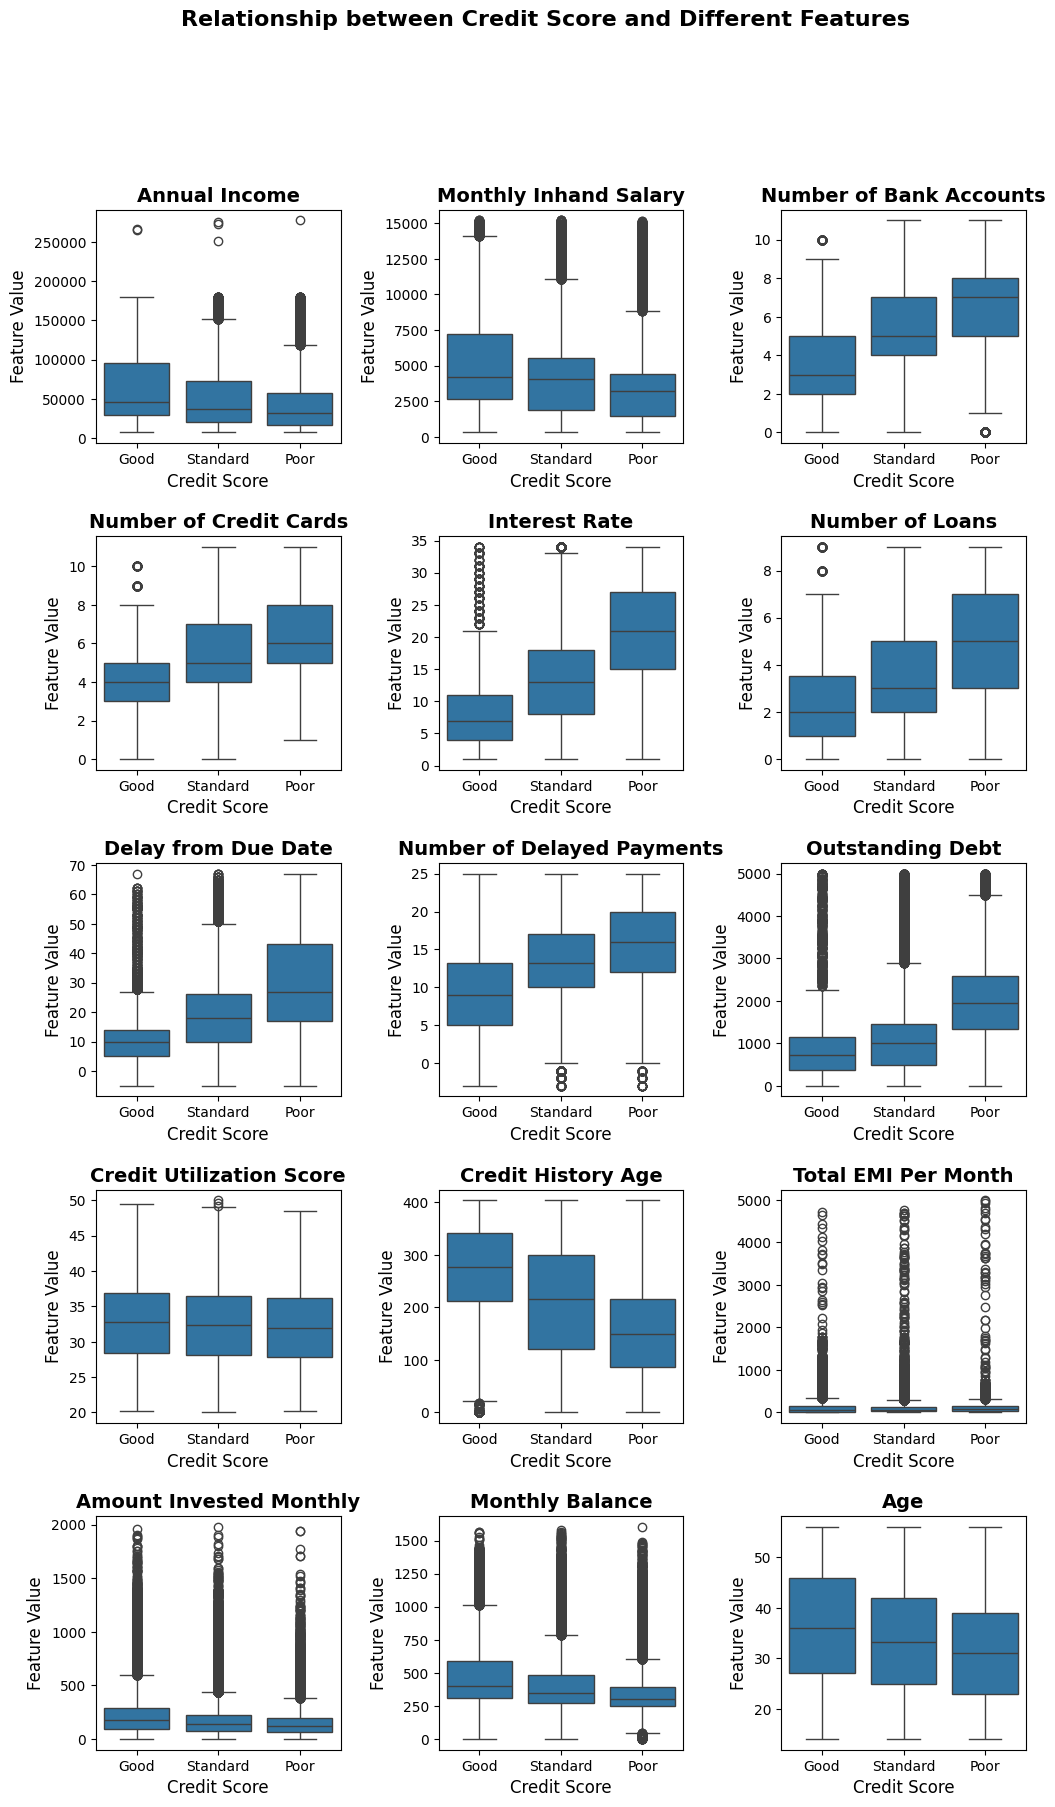

In [22]:
# Create a figure and 2x3 grid of subplots
fig, ax = plt.subplots(5, 3, figsize=(12, 20))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()
# Plot multiple box plots on the same axis
sns.boxplot(x='Credit_Score', y='Annual_Income', data=data, ax=ax[0])
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=data, ax=ax[1])
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=data, ax=ax[2])
sns.boxplot(x='Credit_Score', y='Num_Credit_Card', data=data, ax=ax[3])
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=data, ax=ax[4])
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=data, ax=ax[5])
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=data, ax=ax[6])
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=data, ax=ax[7])
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=data, ax=ax[8])
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=data, ax=ax[9])
sns.boxplot(x='Credit_Score', y='Credit_History', data=data, ax=ax[10])
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=data, ax=ax[11])
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=data, ax=ax[12])
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=data, ax=ax[13])
sns.boxplot(x='Credit_Score', y='Age', data=data, ax=ax[14])

# Add a title and labels
#plt.title('Relationship between Credit Score and Different Features')
plt.xlabel('Credit Score')
plt.ylabel('Feature Value')

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Add a white grid
for i in range(15):
    ax[i].grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

# Add a title and labels
fig.suptitle('Relationship between Credit Score and Different Features', fontsize=16, fontweight='bold')

# Set the font size for all subplot titles
titles = ['Annual Income', 'Monthly Inhand Salary', 'Number of Bank Accounts', 'Number of Credit Cards',
          'Interest Rate', 'Number of Loans', 'Delay from Due Date', 'Number of Delayed Payments',
          'Outstanding Debt', 'Credit Utilization Score', 'Credit History Age', 'Total EMI Per Month',
          'Amount Invested Monthly', 'Monthly Balance', 'Age']
for i in range(15):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')

    # Set the font size for all x and y labels
for i in range(15):
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)

# Show the plot
plt.show()

In [23]:
label_encoder = LabelEncoder()

data["Occupation"] = label_encoder.fit_transform(data["Occupation"])
data['Type_of_Loan'] = label_encoder.fit_transform(data['Type_of_Loan'])
data['Payment_Behaviour'] = label_encoder.fit_transform(data['Payment_Behaviour'])
data["Payment_of_Min_Amount"] = label_encoder.fit_transform(data["Payment_of_Min_Amount"])
data["Credit_Score"]=data["Credit_Score"].map({"Standard":0,"Good":1,"Poor":2})

In [24]:
data.shape

(100000, 23)

<Axes: ylabel='count'>

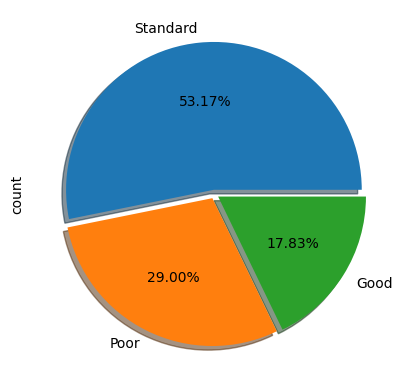

In [25]:
data["Credit_Score"].value_counts().plot.pie(explode = [0.03,0.03,0.03], autopct="%1.2f%%",shadow = True,labels = ["Standard","Poor","Good"])

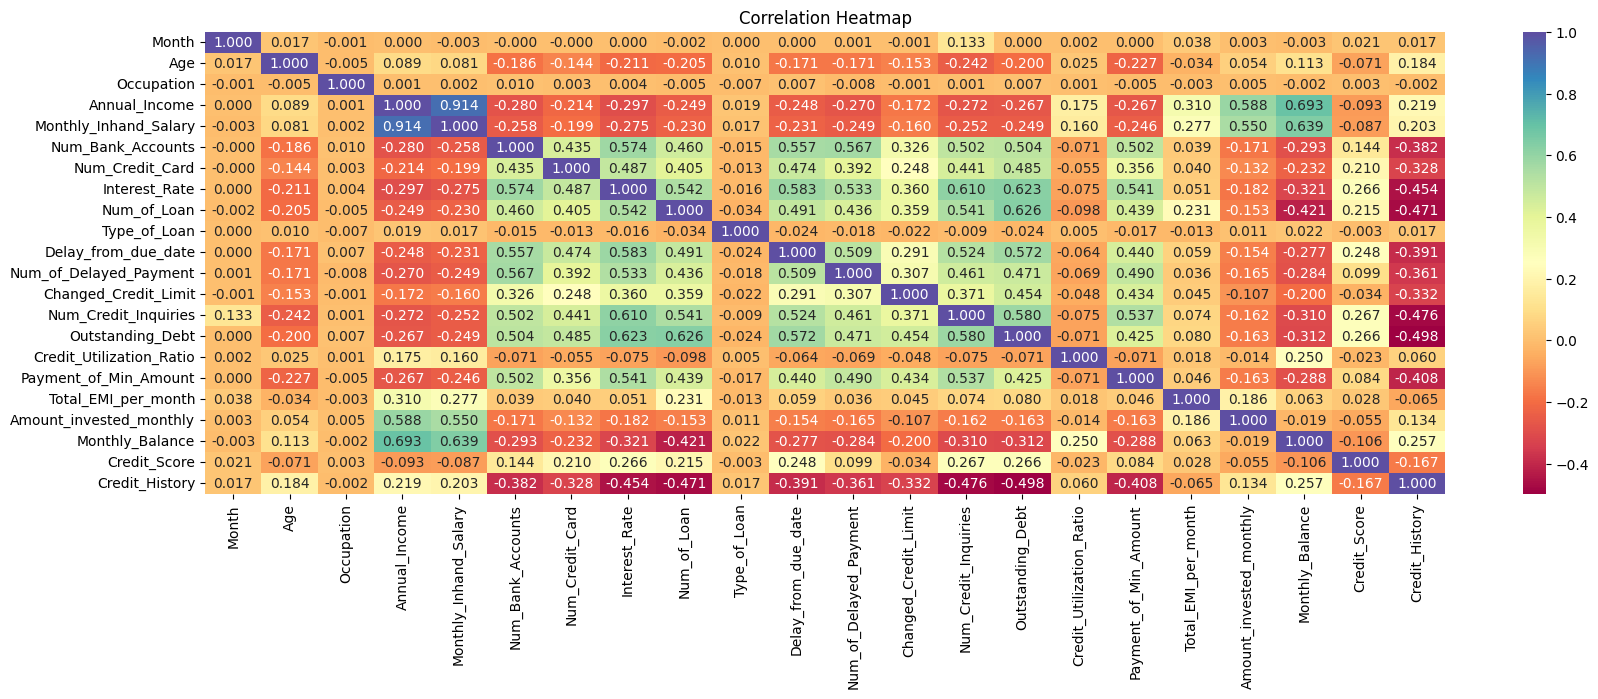

In [26]:
#Matrice de corrélation
def show_heat_map(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(20, 6))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="Spectral",
        fmt=".3f",
    )
    plt.title("Correlation Heatmap")

show_heat_map(data.drop(["Payment_Behaviour"], axis=1))

Modeling

In [27]:
X = data.drop("Credit_Score", axis=1)
y = data["Credit_Score"]
scaler = StandardScaler()
X_standard = pd.DataFrame(scaler.fit_transform(X))

In [28]:
result_list = {"Lasso" : [],"Ridge" : [],"PCA" : []}

def calculate(y_test, y_pred, y_proba, y_bin, method_name, num_of_features, model_name):

    dictionary = {
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1" : f1_score(y_test, y_pred, average='weighted'),
        "recall" : recall_score(y_test, y_pred, average='weighted'),
        "precision" :  precision_score(y_test, y_pred, average='weighted'),
        "roc_auc" : roc_auc_score(y_test, y_proba, multi_class="ovr"),
        "number_of_features" : num_of_features,
        "model_name" : model_name,
        "confusion_matrix" :  confusion_matrix(y_test, y_pred),
        "roc_curve" : None
    }

    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(y_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    dictionary["roc_curve"] = [fpr, tpr, roc_auc]
    result_list[method_name].append(dictionary)

In [29]:
def fit_model(X_selected, y,method_name ,model, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    y_bin = label_binarize(y_test, classes=[0,1,2])
    calculate(y_test, y_pred, y_proba, y_bin, method_name,X_selected.shape[1], model_name)


In [30]:
data.isna().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


In [31]:


# 1. Définir une fonction pour sélectionner les variables importantes avec Lasso
def lasso_feature_selection(X, y, alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    selected_features = X.columns[lasso.coef_ != 0]
    return X[selected_features]

# 2. Définir l'espace de recherche pour alpha
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# 3. Configurer GridSearchCV
param_grid = {'alpha': alphas}
lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_standard, y)

# 4. Obtenir la meilleure valeur d'alpha
best_alpha = grid_search.best_params_['alpha']
print("Meilleure valeur de alpha:", best_alpha)

# 5. Utiliser la meilleure valeur d'alpha pour sélectionner les features
X_selected = lasso_feature_selection(X_standard, y, best_alpha)

# 6. Entraîner différents modèles avec les features sélectionnées


fit_model(X_selected, y, "Lasso", RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
fit_model(X_selected, y, "Lasso", KNeighborsClassifier(), "KNeighborsClassifier")
fit_model(X_selected, y, "Lasso", DecisionTreeClassifier(), "DecisionTreeClassifier")
fit_model(X_selected, y, "Lasso", LogisticRegression(), "LogisticRegression")


Meilleure valeur de alpha: 0.001


In [32]:


# 1. Définir une fonction pour Ridge
def ridge(X, y, alpha):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    # Note: Ridge ne fait pas de sélection de variables
    selected = X.columns[ridge.coef_ != 0]
    return X[selected]

# 2. Optimiser alpha avec GridSearchCV
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alphas}
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_standard, y)

# 3. Obtenir la meilleure valeur d'alpha
best_alpha = grid_search.best_params_['alpha']
print("Meilleure valeur de alpha pour Ridge:", best_alpha)

# 4. Entraîner Ridge avec la meilleure valeur d'alpha
X_selected = ridge(X_standard, y, best_alpha)

# 5. Entraîner différents modèles avec les features

fit_model(X_selected, y, "Ridge", RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
fit_model(X_selected, y, "Ridge", DecisionTreeClassifier(), "DecisionTreeClassifier")
fit_model(X_selected, y, "Ridge", KNeighborsClassifier(), "KNeighborsClassifier")
fit_model(X_selected, y, "Ridge", LogisticRegression(), "LogisticRegression")


Meilleure valeur de alpha pour Ridge: 100


In [33]:
#PCA
def PCA_feature_selection(X,explained_variance_threshold=0.95):
    pca = PCA()
    pca.fit(X)
    cumulative_variance = pca.explained_variance_ratio_.cumsum()

    # Trouver le nombre minimum de composantes pour atteindre le seuil
    k = (cumulative_variance >= explained_variance_threshold).argmax() + 1
    pca = PCA(n_components=k)
    pca.fit(X)

    data = pca.transform(X)
    return data


fit_model(PCA_feature_selection(X_standard), y,"PCA",RandomForestClassifier(n_jobs=-1),"RandomForestClassifier")
fit_model(PCA_feature_selection(X_standard), y,"PCA",DecisionTreeClassifier(),"DecisionTreeClassifier")
fit_model(PCA_feature_selection(X_standard), y,"PCA",KNeighborsClassifier(), "KNeighborsClassifier")
fit_model(PCA_feature_selection(X_standard), y,"PCA",LogisticRegression(), "LogisticRegression")

In [34]:
models_data = []

for model_name, model_data in result_list.items():
    for j in range(len(model_data)):
        model_item = model_data[j]
        model_entry = {
            'method_name' : model_name,
            'model_name': model_item["model_name"],
            'accuracy': model_item["accuracy"],
            'f1': model_item["f1"],
            'recall': model_item["recall"],
            'precision': model_item["precision"],
            'roc_auc' : model_item["roc_auc"],
            'number_of_features': model_item["number_of_features"],
            'confusion_matrix' : model_item["confusion_matrix"],
            "roc_curve" : model_item["roc_curve"]
        }
        models_data.append(model_entry)

score_dataframe = pd.DataFrame(models_data)
best_method = score_dataframe[score_dataframe["accuracy"] == score_dataframe["accuracy"].max()]

In [35]:
score_dataframe.drop(["confusion_matrix", "roc_curve"], axis=1)


,method_name,model_name,accuracy,f1,recall,precision,roc_auc,number_of_features
0,Lasso,RandomForestClassifier,0.79270,0.792288,0.79270,0.792399,0.915040,19
1,Lasso,KNeighborsClassifier,0.68950,0.686786,0.68950,0.687118,0.828477,19
2,Lasso,DecisionTreeClassifier,0.70210,0.702366,0.70210,0.702700,0.759326,19
3,Lasso,LogisticRegression,0.64210,0.633842,0.64210,0.640207,0.792471,19
4,Ridge,RandomForestClassifier,0.79890,0.798402,0.79890,0.798556,0.923398,22
5,Ridge,DecisionTreeClassifier,0.70090,0.700992,0.70090,0.701091,0.755904,22
6,Ridge,KNeighborsClassifier,0.70255,0.699053,0.70255,0.701873,0.842853,22
7,Ridge,LogisticRegression,0.64085,0.633017,0.64085,0.638112,0.796098,22
8,PCA,RandomForestClassifier,0.71295,0.708699,0.71295,0.712980,0.865286,18
9,PCA,DecisionTreeClassifier,0.60330,0.603535,0.60330,0.603790,0.672231,18


Result

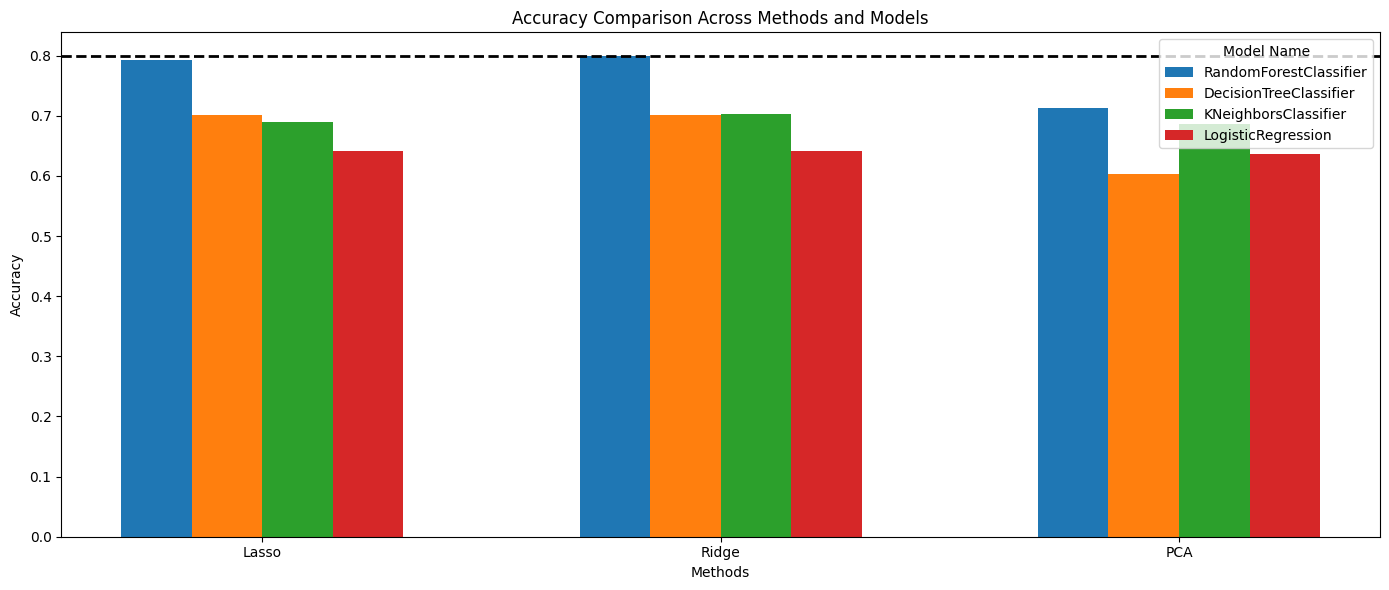

In [36]:

models = ["RandomForestClassifier", "DecisionTreeClassifier", "KNeighborsClassifier", "LogisticRegression"] # Define models here
# Palette de couleurs adaptée au nombre de modèles
palette = sns.color_palette("tab10", n_colors=len(models))

# Taille de la figure
plt.figure(figsize=(14, 6))

# Largeur des barres et espace entre les groupes
bar_width = 0.2
spacing = 0.5  # Espace entre groupes de méthodes

# Calculer les positions des barres
positions = []
start_pos = 0
methods = ["Lasso", "Ridge", "PCA"]

for method in methods:
    method_data = score_dataframe[score_dataframe['method_name'] == method]
    x_positions = [start_pos + i * bar_width for i in range(len(models))]
    positions.append(x_positions)
    start_pos += len(models) * bar_width + spacing

# Tracer les barres
for i, method in enumerate(methods):
    method_data = score_dataframe[score_dataframe['method_name'] == method]
    x_positions = positions[i]
    for j, model in enumerate(models):
        model_data = method_data[method_data['model_name'] == model]
        if not model_data.empty:  # Vérifier si le modèle existe pour cette méthode
            accuracy = model_data['accuracy'].values[0]
            plt.bar(
                x_positions[j],
                accuracy,
                bar_width,
                color=palette[j],
                label=model if i == 0 else ""  # Ajouter la légende uniquement pour le premier groupe
            )
min_accuracy = min(score_dataframe["accuracy"])
max_accuracy = max(score_dataframe["accuracy"])
plt.axhline(
    y=max_accuracy,  # Position de la ligne horizontale
    color='black',  # Couleur de la ligne
    linestyle='--',  # Style de la ligne
    linewidth=2,  # Largeur de la ligne
)
# Configurer les axes
x_ticks = [pos + (len(models) - 1) * bar_width / 2 for pos in [p[0] for p in positions]]
plt.xticks(x_ticks, methods)
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Across Methods and Models")

# Supprimer les doublons dans la légende
handles, labels = plt.gca().get_legend_handles_labels()
by_label = {label: handle for label, handle in zip(labels, handles)}
plt.legend(by_label.values(), by_label.keys(), title="Model Name")

plt.tight_layout()

# Afficher le graphique
plt.show()
